# Week2,Adventure Works Sales

## Establish Connection with Sqlite

In [1]:
import sqlite3
import pandas as pd


In [2]:
# Connect to the SQLite database
path = (r'C:\Users\calua\Desktop\3Signet\Sales_Adventure_Works.db')
connect = sqlite3.connect(path)

#check connection
print("Connected to database")

Connected to database


#### Check if all tables are pulled through


In [3]:
#Connect to the SQLITE database
cursor = connect.cursor()

#select all tables in the sales adventure works database
cursor.execute("Select name from sqlite_master where type ='table';")
tables = cursor.fetchall()

#Print all the table names
print("Table Name in Sale Adventure Works Database:\n")
for table in tables:
    print(table[0])


Table Name in Sale Adventure Works Database:

AdventureWorks_Territories
sqlite_sequence
AdventureWorks_Product_Categories
AdventureWorks_Returns
AdventureWorks_Product_Subcategories
AdventureWorks_Customers
AdventureWorks_Products
Calender
AdventureWorks_Sales_Data


## Load Database into Pandas DataFrame

In [4]:
#Define a function for loading tables from database to the dataframe

def tables_to_dataframe(table):
    return pd.read_sql_query(table,connect)

#Tables
query_sales = tables_to_dataframe("SELECT * FROM AdventureWorks_Sales_Data")
query_returns = tables_to_dataframe("SELECT * FROM AdventureWorks_Returns")
query_Customers = tables_to_dataframe("SELECT * FROM AdventureWorks_Customers")
query_products = tables_to_dataframe("SELECT * FROM AdventureWorks_Products")
query_Product_Categories = tables_to_dataframe("SELECT * FROM AdventureWorks_Product_Categories")
query_Product_Subcategories = tables_to_dataframe("SELECT * FROM AdventureWorks_Product_Subcategories")
query_Product_Territories = tables_to_dataframe("SELECT * FROM AdventureWorks_Territories")
query_Calender = tables_to_dataframe("SELECT * FROM Calender")

print("Tables successfuly loaded")

Tables successfuly loaded


# Data Preprocessing and Validation

#### Overview of dataframe

In [5]:
#check sales table
query_sales.head(5)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1


In [6]:
#check for null values and column data types
query_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      56046 non-null  object
 1   StockDate      56046 non-null  object
 2   OrderNumber    56046 non-null  object
 3   ProductKey     56046 non-null  int64 
 4   CustomerKey    56046 non-null  int64 
 5   TerritoryKey   56046 non-null  int64 
 6   OrderLineItem  56046 non-null  int64 
 7   OrderQuantity  56046 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.4+ MB


In [7]:
#Return table
query_returns.head(5)

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,Return_ID
0,1/18/2015,9,312,1,1
1,1/18/2015,10,310,1,2
2,1/21/2015,8,346,1,3
3,1/22/2015,4,311,1,4
4,2/2/2015,6,312,1,5


In [8]:
query_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ReturnDate      1809 non-null   object
 1   TerritoryKey    1809 non-null   int64 
 2   ProductKey      1809 non-null   int64 
 3   ReturnQuantity  1809 non-null   int64 
 4   Return_ID       1809 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 70.8+ KB


In [9]:
#Customer Table
query_Customers.head(5)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,"90,000.00",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"60,000.00",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,"60,000.00",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"70,000.00",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,"80,000.00",5,Bachelors,Professional,Y


In [10]:
query_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   Prefix          18018 non-null  object
 2   FirstName       18148 non-null  object
 3   LastName        18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18148 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  object
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


In [11]:
#Product table
query_products.head(5)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442


In [13]:
query_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             293 non-null    int64  
 1   ProductSubcategoryKey  293 non-null    int64  
 2   ProductSKU             293 non-null    object 
 3   ProductName            293 non-null    object 
 4   ModelName              293 non-null    object 
 5   ProductDescription     293 non-null    object 
 6   ProductColor           293 non-null    object 
 7   ProductSize            293 non-null    object 
 8   ProductStyle           293 non-null    object 
 9   ProductCost            293 non-null    float64
 10  ProductPrice           293 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 25.3+ KB


In [14]:
#Product Catergory
query_Product_Categories.head(5)

,ProductCategoryKey,CategoryName
0,1,Bikes
1,2,Components
2,3,Clothing
3,4,Accessories


In [15]:
query_Product_Categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductCategoryKey  4 non-null      int64 
 1   CategoryName        4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [16]:
query_Product_Subcategories.head(5)

,ProductSubcategoryKey,SubcategoryName,ProductCategoryKey
0,1,Mountain Bikes,1
1,2,Road Bikes,1
2,3,Touring Bikes,1
3,4,Handlebars,2
4,5,Bottom Brackets,2


In [17]:
query_Product_Subcategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductSubcategoryKey  37 non-null     int64 
 1   SubcategoryName        37 non-null     object
 2   ProductCategoryKey     37 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1020.0+ bytes


In [19]:
query_Product_Territories.head(5)

,SalesTerritoryKey,Region,Country,Continent
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


In [20]:
query_Product_Territories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesTerritoryKey  10 non-null     int64 
 1   Region             10 non-null     object
 2   Country            10 non-null     object
 3   Continent          10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [23]:
#Calender
query_Calender.head(5)

,Date,Year,Month
0,1/1/2015,2015,1
1,1/2/2015,2015,1
2,1/3/2015,2015,1
3,1/4/2015,2015,1
4,1/5/2015,2015,1


In [21]:
query_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    912 non-null    object
 1   Year    912 non-null    object
 2   Month   912 non-null    object
dtypes: object(3)
memory usage: 21.5+ KB


## Converting data into a suitable format

#### converting all date to be in a date time format

In [23]:


#changeOrder Date and StockDate type from being object to dateformart
query_sales['OrderDate'] = pd.to_datetime(query_sales['OrderDate'])
query_sales['StockDate'] = pd.to_datetime(query_sales['StockDate'])

#change Return Date type from being object to dateformart
query_returns['ReturnDate'] = pd.to_datetime(query_returns['ReturnDate'])

#change Return Date type from being object to dateformart
query_Calender['Date'] = pd.to_datetime(query_Calender['Date'])

print("Date have been successfully converted to datetime format.")

Date have been successfully converted to datetime format.


#### Convert Annual Income Data type to float

In [24]:
#Remove any unwanted characters (commas and currency symbols like '$')
query_Customers['AnnualIncome'] = query_Customers['AnnualIncome'].replace({'\$': '', ',': ''}, regex=True)
# Convert to float
query_Customers['AnnualIncome'] = pd.to_numeric(query_Customers['AnnualIncome'], errors='coerce').astype(float)
# Check the result
print(query_Customers.dtypes)  # Ensure that AnnualIncome is now float

CustomerKey         int64
Prefix             object
FirstName          object
LastName           object
BirthDate          object
MaritalStatus      object
Gender             object
EmailAddress       object
AnnualIncome      float64
TotalChildren       int64
EducationLevel     object
Occupation         object
HomeOwner          object
dtype: object


#### Normalize string columns

In [27]:
# Normalize string columns
query_Customers['FirstName'] = query_Customers['FirstName'].str.strip().str.capitalize()
query_Customers['LastName'] = query_Customers['LastName'].str.strip().str.capitalize()
query_Customers['Prefix'] = query_Customers['Prefix'].str.strip().str.capitalize()

In [28]:
query_Customers.head(5)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,Mr.,Jon,Yang,4/8/1966,M,M,jon24@adventure-works.com,90000.0,2,Bachelors,Professional,Y
1,11001,Mr.,Eugene,Huang,5/14/1965,S,M,eugene10@adventure-works.com,60000.0,3,Bachelors,Professional,N
2,11002,Mr.,Ruben,Torres,8/12/1965,M,M,ruben35@adventure-works.com,60000.0,3,Bachelors,Professional,Y
3,11003,Ms.,Christy,Zhu,2/15/1968,S,F,christy12@adventure-works.com,70000.0,0,Bachelors,Professional,N
4,11004,Mrs.,Elizabeth,Johnson,8/8/1968,S,F,elizabeth5@adventure-works.com,80000.0,5,Bachelors,Professional,Y


## Check for outliers using IQR

In [41]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Applyed to this columns(sales_quantity,return_quantity,annual_income)
outliers_sales_quantity = detect_outliers_iqr(query_sales, 'OrderQuantity')
outliers_return_quantity = detect_outliers_iqr(query_returns, 'ReturnQuantity')
outliers_annual_income = detect_outliers_iqr(query_Customers, 'AnnualIncome')

# Display the outliers found
#print("Outliers in Sales OrderQuantity:\n", outliers_sales_quantity)
#print("Outliers in Returns ReturnQuantity:\n", outliers_return_quantity)
#print("Outliers in Customers AnnualIncome:\n", outliers_annual_income)

In [37]:
#Outlier on return quantity
outliers_return_quantity.head(5)

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity,Return_ID
61,2015-10-13,9,352,2,62
239,2016-08-19,4,477,2,240
283,2016-08-30,1,480,2,284
358,2016-09-16,6,478,2,359
411,2016-09-30,6,528,2,412


In [40]:
#outliers on sales quantity
outliers_annual_income.head(5)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
78,11079,Mr.,Donald,Gonzalez,3/11/1959,S,M,donald20@adventure-works.com,160000.0,0,Graduate Degree,Management,Y
79,11080,Mr.,Damien,Chander,7/17/1959,M,M,damien32@adventure-works.com,170000.0,0,Graduate Degree,Management,Y
177,11180,Mrs.,April,Anand,1/2/1943,M,F,april18@adventure-works.com,160000.0,1,Bachelors,Management,Y
178,11181,Mr.,Devin,Martin,8/8/1943,M,M,devin13@adventure-works.com,170000.0,2,Graduate Degree,Management,Y
234,11240,Mrs.,Anne,Hernandez,12/11/1958,M,F,anne4@adventure-works.com,160000.0,2,Partial College,Professional,Y


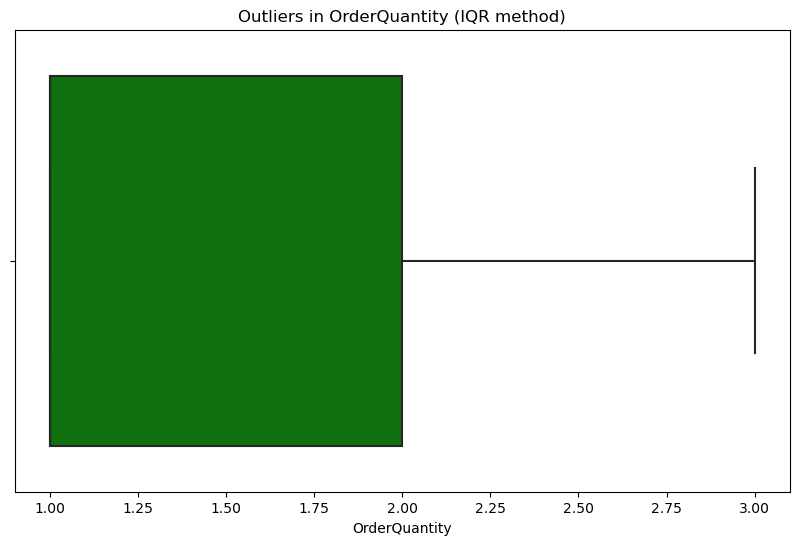

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot data and highlight outliers
def plot_outliers_iqr(data, column, outliers):
    plt.figure(figsize=(10, 6))

    # Box plot with seaborn, which automatically visualizes outliers
    sns.boxplot(x=data[column], color='green')
    
    # Highlight outliers (if any) using a scatter plot
    if not outliers.empty:
        sns.scatterplot(x=outliers[column], y=[0]*len(outliers), color='red', s=100, label='Outliers', marker='X')

    plt.title(f'Outliers in {column} (IQR method)')
    plt.xlabel(column)
    plt.show()

# Detect outliers using the IQR method
outliers_sales_quantity = detect_outliers_iqr(query_sales, 'OrderQuantity')

# Plot the outliers for Sales OrderQuantity
plot_outliers_iqr(query_sales, 'OrderQuantity', outliers_sales_quantity)

### Outliers detected for Returns and anual Income

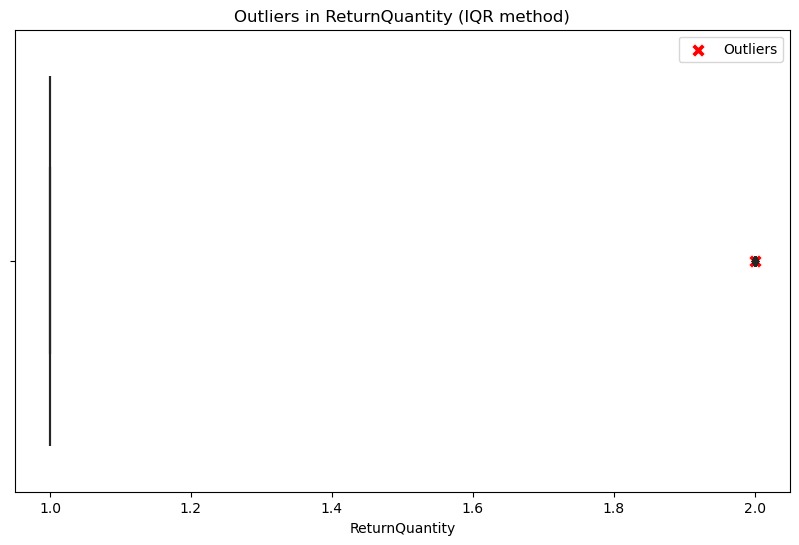

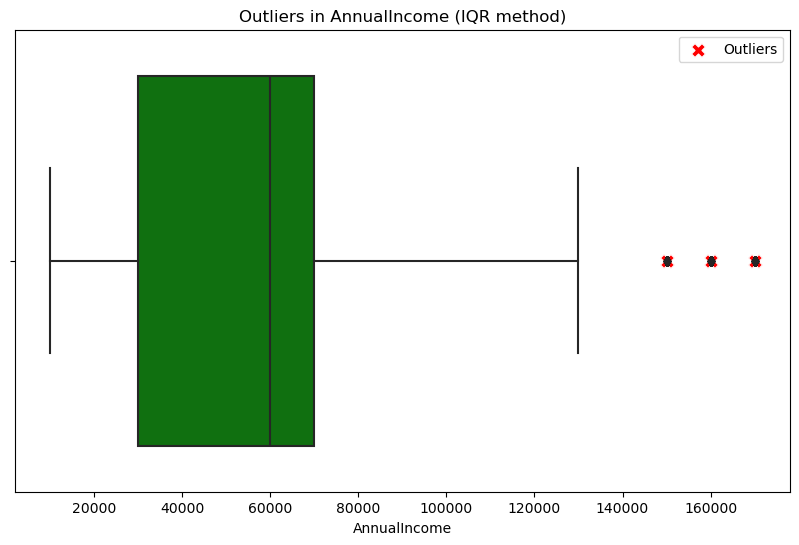

In [35]:
# Detect outliers for Returns ReturnQuantity
outliers_return_quantity = detect_outliers_iqr(query_returns, 'ReturnQuantity')

# Plot the outliers for Returns ReturnQuantity
plot_outliers_iqr(query_returns, 'ReturnQuantity', outliers_return_quantity)

# Detect outliers for Customers AnnualIncome
outliers_annual_income = detect_outliers_iqr(query_Customers, 'AnnualIncome')

# Plot the outliers for Customers AnnualIncome
plot_outliers_iqr(query_Customers, 'AnnualIncome', outliers_annual_income)

## Checking Relationship between the tables